In [1]:
%matplotlib inline

In [2]:
import os, sys
sys.path.append(os.path.abspath('../../main/python'))

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tsa.filtering as filtering
import tsa.processes as proc
import tsa.random as rnd
import tsa.simulation as sim

In [4]:
rnd.randomstate(np.random.RandomState(seed=42), force=True);

In [5]:
X = proc.OrnsteinUhlenbeckProcess(transition=1., vol=1.)

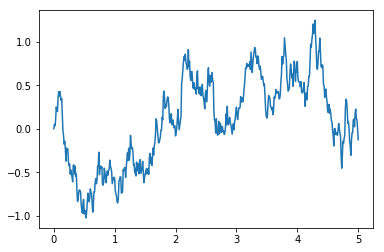

In [6]:
em = sim.EulerMaruyama(process=X, times=sim.xtimes(start=0., stop=5., step=.01))
df = sim.run(em)
plt.plot(df)

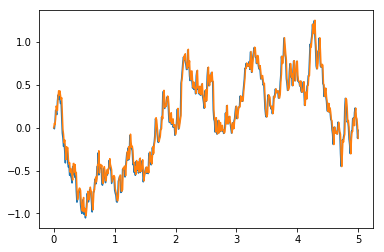

In [7]:
rnd.randomstate(np.random.RandomState(seed=42), force=True);
x = [0.]
ts = [0.]; xs = [x]
for t, v in zip(sim.xtimes(0., 5., .01), rnd.multivatiate_normals(ndim=1)):
    x = X.propagate(t, v, ts[-1], x)
    ts.append(t); xs.append(x.flatten())
plt.plot(ts, xs)
plt.plot(df)
plt.show()